In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import sys
from sklearn.linear_model import LinearRegression
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('mode.chained_assignment', None)

In [69]:
df = pd.read_excel("GPA 2145-16 Compound Properties Table - English.xlsx")
df = df.dropna(subset=['Gross Heating Value Ideal Gas [Btu/ft^3]']).reset_index()

cols = ['Compound', 'CAS', 'Formula', 'Gross Heating Value Ideal Gas [Btu/ft^3]', 'Molar Mass [g/mol]', 
        'Gross Heating Value Ideal Gas [Btu/lbm]',
        'Ideal Gas Relative Density @60F:1atm',
       'Liq. Relative Density @60F:1atm', 'API Gravity @60F:1atm']
df = df[cols]

In [70]:
# Defining BTEX compounds
btex_substrings = ['xylene', 'benzene', 'toluene'] 
aromatic_substrings = ['xylene', 'benzene', 'toluene', 'styrene', 'naphthalene']
naphethenic_substrings = ['cyclo']

df['Is BTEX'] = df['Compound'].str.contains('|'.join(btex_substrings), case=False, na=False)
df['Is Aromatic'] = df['Compound'].str.contains('|'.join(aromatic_substrings), case=False, na=False)
df['Is Naphethenic'] = df['Compound'].str.contains('|'.join(naphethenic_substrings), case=False, na=False)

In [74]:
# Defining BTEX compounds
btex_substrings = ['xylene', 'benzene', 'toluene'] 
aromatic_substrings = ['xylene', 'benzene', 'toluene', 'styrene', 'naphthalene']
naphethenic_substrings = ['cyclo']

df['Is BTEX'] = df['Compound'].str.contains('|'.join(btex_substrings), case=False, na=False)
df['Is Aromatic'] = df['Compound'].str.contains('|'.join(aromatic_substrings), case=False, na=False)
df['Is Naphethenic'] = df['Compound'].str.contains('|'.join(naphethenic_substrings), case=False, na=False)

# Creating the "Is Hydrocarbon" column
df['Is Hydrocarbon'] = df['Formula'].apply(lambda x: 'C' in x and 'H' in x)
df['Is Hydroxyl'] = df['Formula'].apply(lambda x: 'H' in x and 'O' in x)

BTEX_idx = df[df['Is BTEX'] == True].index
aromatic_idx = df[df['Is Aromatic'] == True].index
non_HC_idx = df[df['Is Hydrocarbon'] == False].index
hydroxyl_idx = df[df['Is Hydroxyl'] == True].index
naphethenic_idx = df[df['Is Naphethenic'] == True].index
paraffin_idx = list(set(df.index) - set(aromatic_idx) - set(non_HC_idx) - set(hydroxyl_idx) - set(naphethenic_idx))

df['Is Paraffinic'] = False
df['Is Paraffinic'].loc[paraffin_idx] = True

In [75]:
df.to_csv('GPA 2145-16 Compound Properties Table - English - Truncated and PNA Identified.csv', index=False)

# Begin

In [108]:
df = pd.read_csv('GPA 2145-16 Compound Properties Table - English - Truncated and PNA Identified.csv')

In [152]:
# Labeling for displaying texts
labels = ['methane', 'propane', 'n-butane', 'n-heptane', 'n-octane', 'n-decane', 'cyclohexane', 'cyclopentane', 'ethane',
'n-dodecane','n-tetradecane','n-hexadecane', 'methanol', 'ethanol', 'naphthalene', 'isobutylcyclopentane', 'hydrogen',
 'sulfur dioxide', 'hydrogen sulfide', 'toluene', 'benzene', 'm-xylene', 'pentylbenzene', 'hexylbenzene']
df['Display Text'] = df['Compound'].isin(labels)
df.head(3)

,Compound,CAS,Formula,Gross Heating Value Ideal Gas [Btu/ft^3],Molar Mass [g/mol],Gross Heating Value Ideal Gas [Btu/lbm],Ideal Gas Relative Density @60F:1atm,Liq. Relative Density @60F:1atm,API Gravity @60F:1atm,Is BTEX,Is Aromatic,Is Naphethenic,Is Hydrocarbon,Is Hydroxyl,Is Paraffinic,Display Text
0,methane,74-82-8,CH4,1010.0,16.0425,23892.0,0.5539,0.30000,340.00,False,False,False,True,False,True,True
1,ethane,74-84-0,C2H6,1769.7,30.0690,22334.0,1.0382,0.35628,265.66,False,False,False,True,False,True,True
2,propane,74-98-6,C3H8,2516.1,44.0956,21654.0,1.5225,0.50719,147.49,False,False,False,True,False,True,True


In [153]:
BTEX_idx = df[df['Is BTEX'] == True].index
aromatic_idx = df[df['Is Aromatic'] == True].index
non_HC_idx = df[df['Is Hydrocarbon'] == False].index
hydroxyl_idx = df[df['Is Hydroxyl'] == True].index
paraffinic_idx = df[df['Is Paraffinic'] == True].index
naphethenic_idx = df[df['Is Naphethenic'] == True].index
whole_idx = list(df.index)

In [154]:
x = df['Molar Mass [g/mol]']
#x = df['Ideal Gas Relative Density @60F:1atm']
#x = df['API Gravity @60F:1atm']
#x = df['Gross Heating Value Ideal Gas [Btu/ft^3]']
#x = df['Liq. Relative Density @60F:1atm']
#x = df['API Gravity @60F:1atm']
#x = df['Gross Heating Value Ideal Gas [Btu/lbm]']

#y = df['Molar Mass [g/mol]']
#y = df['Ideal Gas Relative Density @60F:1atm']
#y = df['API Gravity @60F:1atm']
y = df['Gross Heating Value Ideal Gas [Btu/ft^3]']
#y = df['Liq. Relative Density @60F:1atm']
#y = df['API Gravity @60F:1atm']
#y = df['Gross Heating Value Ideal Gas [Btu/lbm]']


#y = df['Gross Heating Value Ideal Gas [Btu/ft^3]'] * (379.5 / y)

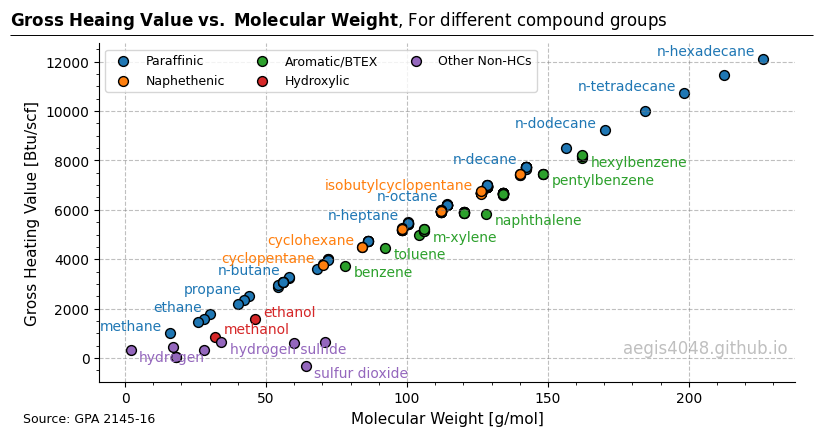

In [164]:
fig, ax = plt.subplots(figsize=(8, 4.5))

alpha = 1
_1 = ax.scatter(x.loc[paraffinic_idx], y.loc[paraffinic_idx], s=50, edgecolor='k', alpha=alpha, label='Paraffinic')
_2 = ax.scatter(x.loc[naphethenic_idx], y.loc[naphethenic_idx], s=50, edgecolor='k', alpha=alpha, label='Naphethenic')
_3 = ax.scatter(x.loc[aromatic_idx], y.loc[aromatic_idx], s=50, edgecolor='k', alpha=alpha, label='Aromatic/BTEX')
_4 = ax.scatter(x.loc[hydroxyl_idx], y.loc[hydroxyl_idx], s=50, edgecolor='k', alpha=alpha, label='Hydroxylic')
_5 = ax.scatter(x.loc[non_HC_idx], y.loc[non_HC_idx], s=50, edgecolor='k', alpha=alpha, label='Other Non-HCs')

c1 = _1.get_facecolor()[0]
c2 = _2.get_facecolor()[0]
c3 = _3.get_facecolor()[0]
c4 = _4.get_facecolor()[0]
c5 = _5.get_facecolor()[0]

ax.legend(fontsize=9, ncol=3)

#selected_idx = excluded_idx
selected_idx = random.sample(whole_idx, k=int(len(whole_idx) * 0.1)) 
texts = df['Compound']
for i, txt in enumerate(texts):
    if df['Display Text'].loc[i]:
        c = c5
        ha ='left'
        va = 'top'
        
        if df['Is Paraffinic'].loc[i]: 
            c = c1
            ha ='right'
            va = 'bottom'
        if df['Is Naphethenic'].loc[i]:
            c = c2
            ha ='right'
            va = 'bottom'
        if df['Is Aromatic'].loc[i]:
            c = c3
            va = 'top'
            ha = 'left'
        if df['Is Hydroxyl'].loc[i]:
            c = c4
            va = 'bottom'
            ha = 'left'
        
        if ha == 'left':
            icr = 3
        else:
            icr= -3
        
        ax.annotate(txt, (x.loc[i] + icr, y.iloc[i]), fontsize=10, c=c, ha=ha, va=va)

ax.minorticks_on()
ax.grid(axis='y', which='major', linestyle='--', color='grey', alpha=0.5)
#ax.grid(axis='y', which='minor', linestyle='--', color='grey', alpha=0.2)
#ax.grid(axis='x', which='minor', color='grey', linestyle='--', alpha=0.2)
ax.grid(axis='x', which='major', color='grey', linestyle='--', alpha=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('Molecular Weight [g/mol]', fontsize=11)
ax.set_ylabel('Gross Heating Value [Btu/scf]', fontsize=11)
ax.text(0.99, 0.1, 'aegis4048.github.io', fontsize=12, ha='right', va='center',
    transform=ax.transAxes, color='grey', alpha=0.5)

#ax.set_xlim(0, 1)
#ax.set_ylim(10000, 30000)

def setbold(txt):
    return ' '.join([r"$\bf{" + item + "}$" for item in txt.split(' ')])

bold_txt = setbold('Gross Heaing Value vs. Molecular Weight')
plain_txt = r', For different compound groups'
fig.suptitle(bold_txt + plain_txt, verticalalignment='top', x=0, horizontalalignment='left', fontsize=12, y=0.96)
yloc = 0.88
ax.annotate('', xy=(0.01, yloc + 0.01), xycoords='figure fraction', xytext=(1.02, yloc + 0.01),
            arrowprops=dict(arrowstyle="-", color='k', lw=0.7))

ax.annotate('Source: GPA 2145-16', xy=(-0.11, -.12), xycoords='axes fraction', fontsize=9)

fig.tight_layout()